# Random Forest Gesamtarchitektur

In [1]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

import warnings

from sklearn import preprocessing

In [2]:
# Random Forest
TREE_PARAMS = {
    "random_state" : 0,
    "max_depth": 7,
    "n_jobs" : -1
}

In [3]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [4]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
bureau = pd.read_csv(DATASET_DIR / "4. FillNA" / "bureau.csv")
pa_pos = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_pos.csv")
pa_ip = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_ip.csv")
pa_cc = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_cc.csv")

In [5]:
app_train = app_train.set_index("SK_ID_CURR")
bureau = bureau.set_index("SK_ID_CURR")
pa_pos = pa_pos.set_index("SK_ID_CURR")
pa_ip = pa_ip.set_index("SK_ID_CURR")
pa_cc = pa_cc.set_index("SK_ID_CURR")

In [6]:
MODEL_APPLICATION = "3.1. Esembler_RandomForest_Application.json"
MODEL_BUREAU = "3.2. Esembler_RandomForest_bureau.json"
MODEL_PA_POS = "3.3. Esembler_RandomForest_pa_pos.json"
MODEL_PA_IP = "3.4. Esembler_RandomForest_pa_ip.json"
MODEL_PA_CC = "3.5. Esembler_RandomForest_pa_cc.json"

In [7]:
with open(DATASET_DIR / "Models" / MODEL_APPLICATION, 'r') as file:
    model_application_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_BUREAU, 'r') as file:
    model_bureau_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_POS, 'r') as file:
    model_pa_pos_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_IP, 'r') as file:
    model_pa_ip_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_CC, 'r') as file:
    model_pa_cc_data = json.load(file)

In [8]:
print(len(model_application_data["keep"]))
print(len(model_bureau_data["keep"]))
print(len(model_pa_pos_data["keep"]))
print(len(model_pa_ip_data["keep"]))
print(len(model_pa_cc_data["keep"]))

10
7
17
27
21


In [9]:
model_application = RandomForestClassifier(**model_application_data["params"])
model_bureau = RandomForestClassifier(**model_bureau_data["params"])
model_pa_pos = RandomForestClassifier(**model_pa_pos_data["params"])
model_pa_ip = RandomForestClassifier(**model_pa_ip_data["params"])
model_pa_cc = RandomForestClassifier(**model_pa_cc_data["params"])

In [10]:
df = app_train[["TARGET"]]
df.head()

,TARGET
SK_ID_CURR,
100002,1.0
100003,0.0
100004,0.0
100006,0.0
100007,0.0


In [11]:
# application prediction

In [12]:
x = app_train[model_application_data["keep"]]
x.head()

,A_EXT_SOURCE_3,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_AMT_REQ_CREDIT_BUREAU_DAY,A_AMT_REQ_CREDIT_BUREAU_HOUR,A_YEARS_BEGINEXPLUATATION_AVG,A_DAYS_EMPLOYED,A_DAYS_BIRTH,A_BASEMENTAREA_AVG,A_LANDAREA_AVG
SK_ID_CURR,,,,,,,,,,
100002,0.139376,0.083037,0.262949,0.000000,0.000000,0.972200,-637.0,-9461.0,0.036900,0.036900
100003,0.344844,0.311267,0.622246,0.000000,0.000000,0.985100,-1188.0,-16765.0,0.052900,0.013000
100004,0.729567,0.550824,0.555912,0.000000,0.000000,0.981667,-225.0,-19046.0,0.075009,0.067504
100006,0.565898,0.666039,0.650442,0.005653,0.008068,0.979744,-3039.0,-19005.0,0.076735,0.068598
100007,0.571390,0.559619,0.322738,0.000000,0.000000,0.982023,-3038.0,-19932.0,0.071043,0.048938


In [13]:
y = app_train.loc[app_train.index]["TARGET"]
y.head()

SK_ID_CURR
100002    1.0
100003    0.0
100004    0.0
100006    0.0
100007    0.0
Name: TARGET, dtype: float64

In [14]:
model_application.fit(x,y)

RandomForestClassifier(max_depth=15, min_samples_leaf=12, n_estimators=900,
                       n_jobs=-1, random_state=0)

In [15]:
predicted = pd.DataFrame(model_application.predict_proba(x), index=app_train.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

In [16]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT
SK_ID_CURR,,,
100002,1.0,0.464536,0.535464
100003,0.0,0.849845,0.150155
100004,0.0,0.973064,0.026936
100006,0.0,0.997312,0.002688
100007,0.0,0.927545,0.072455


In [17]:
# bureau prediction

In [18]:
x = bureau[model_bureau_data["keep"]]
x.head()

,B_Active,B_Closed,B_AMT_CREDIT_SUM,B_AMT_CREDIT_SUM_DEBT,B_DAYS_CREDIT_ENDDATE,B_AMT_CREDIT_SUM_OVERDUE,B_AMT_ANNUITY
SK_ID_CURR,,,,,,,
100002,2.0,6.0,638235.000000,245781.000000,309.000000,0.000000,0.000000
100003,1.0,3.0,810000.000000,0.000000,1216.000000,0.000000,0.000000
100004,0.0,2.0,792471.023437,353526.556281,1172.145688,0.001962,2735.621154
100007,0.0,1.0,635755.340213,291016.898931,1163.754146,0.002387,2634.913696
100008,1.0,2.0,267606.000000,240057.000000,471.000000,0.000000,0.000000


In [19]:
y = app_train.loc[bureau.index]["TARGET"]
y.head()

SK_ID_CURR
100002    1.0
100003    0.0
100004    0.0
100007    0.0
100008    0.0
Name: TARGET, dtype: float64

In [20]:
model_bureau.fit(x,y)

RandomForestClassifier(max_depth=15, min_samples_leaf=17, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [21]:
predicted = pd.DataFrame(model_bureau.predict_proba(x), index=bureau.index)
predicted.columns = ["B_PAYBACK", "B_DEFAULT"]

In [22]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT
SK_ID_CURR,,,,,
100002,1.0,0.464536,0.535464,0.941796,0.058204
100003,0.0,0.849845,0.150155,0.958946,0.041054
100004,0.0,0.973064,0.026936,0.946013,0.053987
100006,0.0,0.997312,0.002688,NaN,NaN
100007,0.0,0.927545,0.072455,0.929448,0.070552


In [23]:
# pa_pos prediction

In [24]:
x = pa_pos[model_pa_pos_data["keep"]]
x.head()

,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_AMT_ANNUITY,PA_AMT_GOODS_PRICE,PA_AMT_DOWN_PAYMENT,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_POS_CNT_DPD,PA_AMT_CREDIT,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_YIELD_GROUP_high,PA_POS_CNT_PAYMENTS_LEFT,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_CREDITS,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,
158271,0.0,6404.310,58905.000,0.000,0.0,0.0,65124.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
252457,0.0,4951.350,47056.275,4.275,1.0,0.0,52641.0,0.000088,0.0,9.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0
260094,1.0,97839.945,2023469.370,8765.370,1.0,0.0,2294779.5,0.312513,4.0,70.0,1.0,3.0,0.0,9.0,4.0,1.0,0.0
176456,0.0,14713.605,123486.075,12349.575,0.0,0.0,120307.5,0.101388,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
256657,7.0,60139.575,1115806.500,78714.000,5.0,0.0,1277523.0,0.699443,0.0,28.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0


In [25]:
y = app_train.loc[pa_pos.index]["TARGET"]
y.head()

SK_ID_CURR
158271    0.0
252457    0.0
260094    0.0
176456    0.0
256657    0.0
Name: TARGET, dtype: float64

In [26]:
model_pa_pos.fit(x,y)

RandomForestClassifier(max_depth=11, min_samples_leaf=24, n_estimators=1000,
                       n_jobs=-1, random_state=0)

In [27]:
predicted = pd.DataFrame(model_pa_pos.predict_proba(x), index=pa_pos.index)
predicted.columns = ["PA_POS_PAYBACK", "PA_POS_DEFAULT"]

In [28]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT
SK_ID_CURR,,,,,,,
100002,1.0,0.464536,0.535464,0.941796,0.058204,0.923132,0.076868
100003,0.0,0.849845,0.150155,0.958946,0.041054,0.963469,0.036531
100004,0.0,0.973064,0.026936,0.946013,0.053987,0.899767,0.100233
100006,0.0,0.997312,0.002688,NaN,NaN,0.951232,0.048768
100007,0.0,0.927545,0.072455,0.929448,0.070552,0.922100,0.077900


In [29]:
# pa_ip prediction

In [30]:
x = pa_ip[model_pa_ip_data["keep"]]
x.head()

,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_IP_DAYS_DIFF_60,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_IP_DAYS_DIFF_30,PA_AMT_ANNUITY,PA_IP_DAYS_DIFF_120,PA_IP_DAYS_DIFF_90,PA_IP_DAYS_DIFF_180,PA_AMT_CREDIT,PA_IP_PAYMENT_180,PA_AMT_APPLICATION,PA_IP_AMT_DIFF_60,PA_IP_AMT_DIFF_30,PA_IP_DAYS_DIFF_150,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_IP_PAYMENT_60,PA_IP_AMT_DIFF_180,PA_IP_AMT_DIFF_90,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_IP_AMT_DIFF_150,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_PRODUCT_COMBINATION_POS industry with interest,PA_RATE_DOWN_PAYMENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,
252457,1.0,-15.0,0.0,0.0,4951.350,-14.0,-17.0,0.0,52641.0,-0.912871,47056.275,0.0,0.0,0.0,0.0,0.0,9.128709e-01,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.000088
256657,5.0,-13.0,7.0,-6.0,49054.770,-12.5,-12.0,-1.5,1198062.0,-1.020621,978570.000,0.0,0.0,-13.0,2.0,0.0,2.041241e-01,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.217818
198678,0.0,-21.5,0.0,-20.0,98806.050,-1.0,-6.5,-0.5,941661.0,0.000204,921721.500,0.0,0.0,0.5,0.0,0.0,4.540312e-08,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.193358
394447,1.0,-7.0,0.0,-0.5,17141.445,-6.5,-7.0,0.0,129132.0,-0.412932,129132.000,0.0,0.0,-8.5,0.0,0.0,6.115381e-01,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.000000
156331,0.0,0.0,0.0,0.0,40866.795,-1.0,0.0,-5.0,793035.0,0.616385,793035.000,0.0,0.0,-12.5,1.0,0.0,1.416426e-02,0.0,0.0,2.0,0.0,1.0,3.0,1.0,0.0,0.0,0.000000


In [31]:
y = app_train.loc[pa_ip.index]["TARGET"]
y.head()

SK_ID_CURR
252457    0.0
256657    0.0
198678    0.0
394447    0.0
156331    0.0
Name: TARGET, dtype: float64

In [32]:
model_pa_ip.fit(x,y)

RandomForestClassifier(max_depth=13, min_samples_leaf=15, n_estimators=1100,
                       n_jobs=-1, random_state=0)

In [33]:
predicted = pd.DataFrame(model_pa_ip.predict_proba(x), index=pa_ip.index)
predicted.columns = ["PA_IP_PAYBACK", "PA_IP_DEFAULT"]

In [34]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT
SK_ID_CURR,,,,,,,,,
100002,1.0,0.464536,0.535464,0.941796,0.058204,0.923132,0.076868,0.938983,0.061017
100003,0.0,0.849845,0.150155,0.958946,0.041054,0.963469,0.036531,NaN,NaN
100004,0.0,0.973064,0.026936,0.946013,0.053987,0.899767,0.100233,NaN,NaN
100006,0.0,0.997312,0.002688,NaN,NaN,0.951232,0.048768,0.940915,0.059085
100007,0.0,0.927545,0.072455,0.929448,0.070552,0.922100,0.077900,0.908397,0.091603


In [35]:
# pa_cc prediction

In [36]:
x = pa_cc[model_pa_cc_data["keep"]]
x.head()

,PA_CC_BALANCE_60,PA_CC_BALANCE_30,PA_CC_BALANCE_90,PA_CC_BALANCE_180,PA_CC_BALANCE_120,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CC_PAYMENT_60,PA_CC_PAYMENT_180,PA_CC_PAYMENT_120,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_AMT_CREDIT,PA_AMT_APPLICATION,PA_AMT_GOODS_PRICE,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_PRODUCT_COMBINATION_POS industry with interest,PA_CC_DPD_180
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
394447,1.434002,-1.206367,0.992963,-0.455389,-0.349513,1.0,1.008387,1.318045,-0.292196,0.0,45000.0,45000.0,45000.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
361282,0.828945,0.946004,0.861611,-1.169080,-0.393110,1.0,1.109609,-1.152838,-1.267179,0.0,45000.0,45000.0,45000.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
436351,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,3.0,45000.0,45000.0,45000.0,3.0,2.0,0.0,3.0,6.0,1.0,0.0,0.0
181153,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,3.0,45000.0,45000.0,45000.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0
309691,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,45000.0,45000.0,45000.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [37]:
y = app_train.loc[pa_cc.index]["TARGET"]
y.head()

SK_ID_CURR
394447    0.0
361282    0.0
436351    0.0
181153    0.0
309691    0.0
Name: TARGET, dtype: float64

In [38]:
model_pa_cc.fit(x,y)

RandomForestClassifier(max_depth=9, min_samples_leaf=15, n_estimators=800,
                       n_jobs=-1, random_state=0)

In [39]:
predicted = pd.DataFrame(model_pa_cc.predict_proba(x), index=pa_cc.index)
predicted.columns = ["PA_CC_PAYBACK", "PA_CC_DEFAULT"]

In [40]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT,PA_CC_PAYBACK,PA_CC_DEFAULT
SK_ID_CURR,,,,,,,,,,,
100002,1.0,0.464536,0.535464,0.941796,0.058204,0.923132,0.076868,0.938983,0.061017,NaN,NaN
100003,0.0,0.849845,0.150155,0.958946,0.041054,0.963469,0.036531,NaN,NaN,NaN,NaN
100004,0.0,0.973064,0.026936,0.946013,0.053987,0.899767,0.100233,NaN,NaN,NaN,NaN
100006,0.0,0.997312,0.002688,NaN,NaN,0.951232,0.048768,0.940915,0.059085,0.959447,0.040553
100007,0.0,0.927545,0.072455,0.929448,0.070552,0.922100,0.077900,0.908397,0.091603,NaN,NaN


In [41]:
df = df.fillna(0.5)
TEST = df.copy()
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT,PA_CC_PAYBACK,PA_CC_DEFAULT
SK_ID_CURR,,,,,,,,,,,
100002,1.0,0.464536,0.535464,0.941796,0.058204,0.923132,0.076868,0.938983,0.061017,0.500000,0.500000
100003,0.0,0.849845,0.150155,0.958946,0.041054,0.963469,0.036531,0.500000,0.500000,0.500000,0.500000
100004,0.0,0.973064,0.026936,0.946013,0.053987,0.899767,0.100233,0.500000,0.500000,0.500000,0.500000
100006,0.0,0.997312,0.002688,0.500000,0.500000,0.951232,0.048768,0.940915,0.059085,0.959447,0.040553
100007,0.0,0.927545,0.072455,0.929448,0.070552,0.922100,0.077900,0.908397,0.091603,0.500000,0.500000


In [42]:
# finales Modell

In [43]:
model = RandomForestClassifier(**TREE_PARAMS)

TPRs = []
TNRs = []
Ps = []
NPVs = []
Fs = []
As = []
aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df

y = df["TARGET"]
x = df.drop(["TARGET"], axis=1)

for ID_TRAIN, ID_TEST in kfold.split(x):
    
    x_train = x.iloc[ID_TRAIN]
    y_train = y.iloc[ID_TRAIN]
    x_test = x.iloc[ID_TEST]
    y_test = y.iloc[ID_TEST]
    
    model.fit(x_train, y_train)
    (tn,fp),(fn,tp)=confusion_matrix(y_test, model.predict(x_test))
    
    # TPR
    TPR = R = tp/(tp+fn)
    # TNR
    TNR = tn/(tn+fp)
    # Precision
    P = tp/(tp+fp)
    # NPV
    NPV = tn/(tn+fn)
    # F-Score
    F = 2*P*R/(P+R)
    # Accuracy
    A = (tp+tn)/(tp+tn+fp+fn)
    # AUC
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    
    TPRs.append(TPR)
    TNRs.append(TNR)
    Ps.append(P)
    NPVs.append(NPV)
    Fs.append(F)
    As.append(A)
    aucs.append(auc)
    
    print('TPR: %.4f' % TPR, 'TNR: %.4f' % TNR, 'P: %.4f' % P, 'NPV: %.4f' % NPV, 'F: %.4f' % F, 'Accuracy: %.4f' % A, 'AUC: %.4f' % auc)

print("\n")
print("Durchschnitte:")
print('TPR: %.4f' % np.mean(TPRs), 'TNR: %.4f' % np.mean(TNRs), 'P: %.4f' % np.mean(Ps), 'NPV: %.4f' % np.mean(NPVs), 'F: %.4f' % np.mean(Fs), 'Accuracy: %.4f' % np.mean(As), 'AUC: %.4f' % np.mean(aucs))

TPR: 0.4175 TNR: 0.9893 P: 0.7743 NPV: 0.9508 F: 0.5425 Accuracy: 0.9431 AUC: 0.9400
TPR: 0.4226 TNR: 0.9887 P: 0.7672 NPV: 0.9512 F: 0.5450 Accuracy: 0.9430 AUC: 0.9372
TPR: 0.4278 TNR: 0.9893 P: 0.7765 NPV: 0.9522 F: 0.5516 Accuracy: 0.9444 AUC: 0.9356
TPR: 0.4194 TNR: 0.9886 P: 0.7698 NPV: 0.9495 F: 0.5429 Accuracy: 0.9413 AUC: 0.9374
TPR: 0.4225 TNR: 0.9892 P: 0.7705 NPV: 0.9523 F: 0.5457 Accuracy: 0.9444 AUC: 0.9351


Durchschnitte:
TPR: 0.4219 TNR: 0.9890 P: 0.7716 NPV: 0.9512 F: 0.5456 Accuracy: 0.9433 AUC: 0.9371


# Betrachtung der False Positives und False Negatives

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
y = df["TARGET"]
x = df.drop(["TARGET"], axis=1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [47]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=-1, random_state=0)

In [48]:
df = pd.DataFrame({"actual":y_test, "predicted": model.predict_proba(x_test)[:,1]})

In [49]:
defaults = df[df["predicted"] > 0.5]
paybacks = df[df["predicted"] < 0.5]

Text(0.5, 1.0, 'Random Forest')

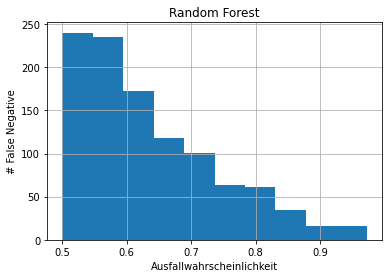

In [50]:
defaults[defaults["actual"] == 0]["predicted"].hist()
plt.xlabel("Ausfallwahrscheinlichkeit")
plt.ylabel("# False Negative")
plt.title("Random Forest")

Text(0.5, 1.0, 'Random Forest')

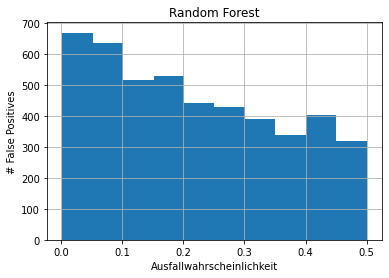

In [51]:
paybacks[paybacks["actual"] == 1]["predicted"].hist()
plt.xlabel("Ausfallwahrscheinlichkeit")
plt.ylabel("# False Positives")
plt.title("Random Forest")

# Simulation eines Kreditwürdigkeitsschocks

- 25% aller Kreditnehmer fallen auf 1/4tel ihrer Kreditwürdigkeit und werden ein Default
- 50% aller Kreditnehmer fallen auf 1/4tel ihrer Kreditwürdigkeit und werden ein Default
- 75% aller Kreditnehmer fallen auf 1/4tel ihrer Kreditwürdigkeit und werden ein Default

In [52]:
# simulation 25

In [53]:
test = TEST.copy()

In [54]:
simulation = pd.read_csv(DATASET_DIR / "5. Simulation" / "app_train25.csv")

simulation = simulation.set_index("SK_ID_CURR")

x = simulation[model_application_data["keep"]]

y = simulation["TARGET"]

predicted = pd.DataFrame(model_application.predict_proba(x), index=simulation.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

test.loc[:,"A_PAYBACK"] = predicted["A_PAYBACK"]
test.loc[:,"A_DEFAULT"] = predicted["A_DEFAULT"]

test = test.drop(["TARGET"],axis=1)

df = pd.DataFrame({"actual":simulation["TARGET"], "predicted": model.predict_proba(test)[:,1]})

(tn,fp),(fn,tp)=confusion_matrix(simulation["TARGET"], model.predict(test))

# TPR
TPR = R = tp/(tp+fn)
print(TPR)
# TNR
TNR = tn/(tn+fp)
print(TNR)
# Precision
P = tp/(tp+fp)
print(P)
# NPV
NPV = tn/(tn+fn)
print(NPV)
# F-Score
F = 2*P*R/(P+R)
print(F)
# Accuracy
A = (tp+tn)/(tp+tn+fp+fn)
print(A)

0.6759888929637974
0.9894518946038213
0.9664868913857678
0.8715655774814027
0.795548293615316
0.8921697110022081


In [55]:
# simulation 50

In [56]:
test = TEST.copy()

In [57]:
simulation = pd.read_csv(DATASET_DIR / "5. Simulation" / "app_train50.csv")

simulation = simulation.set_index("SK_ID_CURR")

x = simulation[model_application_data["keep"]]

y = simulation["TARGET"]

predicted = pd.DataFrame(model_application.predict_proba(x), index=simulation.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

test.loc[:,"A_PAYBACK"] = predicted["A_PAYBACK"]
test.loc[:,"A_DEFAULT"] = predicted["A_DEFAULT"]

test = test.drop(["TARGET"],axis=1)

df = pd.DataFrame({"actual":simulation["TARGET"], "predicted": model.predict_proba(test)[:,1]})

(tn,fp),(fn,tp)=confusion_matrix(simulation["TARGET"], model.predict(test))

# TPR
TPR = R = tp/(tp+fn)
print(TPR)
# TNR
TNR = tn/(tn+fp)
print(TNR)
# Precision
P = tp/(tp+fp)
print(P)
# NPV
NPV = tn/(tn+fn)
print(NPV)
# F-Score
F = 2*P*R/(P+R)
print(F)
# Accuracy
A = (tp+tn)/(tp+tn+fp+fn)
print(A)

0.7131489451349806
0.9892838954277954
0.9873743687184359
0.7458577089010596
0.828150938912169
0.8401000289420542


In [58]:
# simulation 75

In [59]:
test = TEST.copy()

In [60]:
simulation = pd.read_csv(DATASET_DIR / "5. Simulation" / "app_train75.csv")

simulation = simulation.set_index("SK_ID_CURR")

x = simulation[model_application_data["keep"]]

y = simulation["TARGET"]

predicted = pd.DataFrame(model_application.predict_proba(x), index=simulation.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

test.loc[:,"A_PAYBACK"] = predicted["A_PAYBACK"]
test.loc[:,"A_DEFAULT"] = predicted["A_DEFAULT"]

test = test.drop(["TARGET"],axis=1)

df = pd.DataFrame({"actual":simulation["TARGET"], "predicted": model.predict_proba(test)[:,1]})

(tn,fp),(fn,tp)=confusion_matrix(simulation["TARGET"], model.predict(test))

# TPR
TPR = R = tp/(tp+fn)
print(TPR)
# TNR
TNR = tn/(tn+fp)
print(TNR)
# Precision
P = tp/(tp+fp)
print(P)
# NPV
NPV = tn/(tn+fn)
print(NPV)
# F-Score
F = 2*P*R/(P+R)
print(F)
# Accuracy
A = (tp+tn)/(tp+tn+fp+fn)
print(A)

0.7292168140471786
0.9891951519608536
0.9955951200387445
0.5217167535635168
0.8418363615976755
0.7889961659908101
